In [33]:
# 0. IMPORTS
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# 1. LOAD DATA

# 1.1) MNIST from TF collection
mnist_from_tf = tf.keras.datasets.mnist

# Extract: training_images & training_labels are NumPy arrays
(mnist_from_tf_training_images, mnist_from_tf_training_labels), (mnist_from_tf_test_images, mnist_from_tf_test_labels) = mnist_from_tf.load_data()


# 1.2) MNIST dataset: from the folder that was previousely uploaded

# define paths
#current_dir = os.getcwd()
#data_path = os.path.join(current_dir, "./sample_data/mnist.npz")

# load data
(mnist_from_file_training_images, mnist_from_file_training_labels), (mnist_from_file_test_images, mnist_from_file_test_labels) = tf.keras.datasets.mnist.load_data()



LABEL: 4

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  55  59   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   7   9   0   0   0
    0   0   0   5  35 214 232 158   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  14 199 196  18   0   0
    0   0   0 194 253 228  13   0   0   0]
 [  0   0   0   0   0   0   0   0 

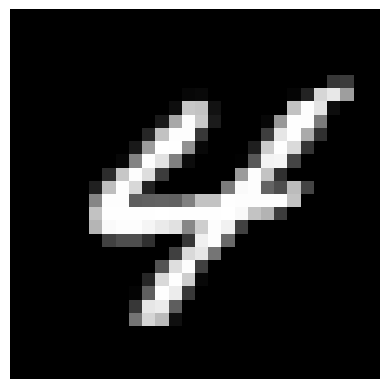

In [35]:
# 2. SHOW SAMPLES

index = 655

# MNIST (from TF)
print(f'LABEL: {mnist_from_tf_training_labels[index]}') # as numbers
print(f'\nIMAGE PIXEL ARRAY:\n {mnist_from_tf_training_images[index]}') # image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(mnist_from_tf_training_images[index]) # as image

# MNIST (from file)
print(f'LABEL: {mnist_from_file_training_labels[index]}') # as numbers
print(f'\nIMAGE PIXEL ARRAY:\n {mnist_from_file_training_images[index]}') # image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(mnist_from_file_training_images[index]) # as image

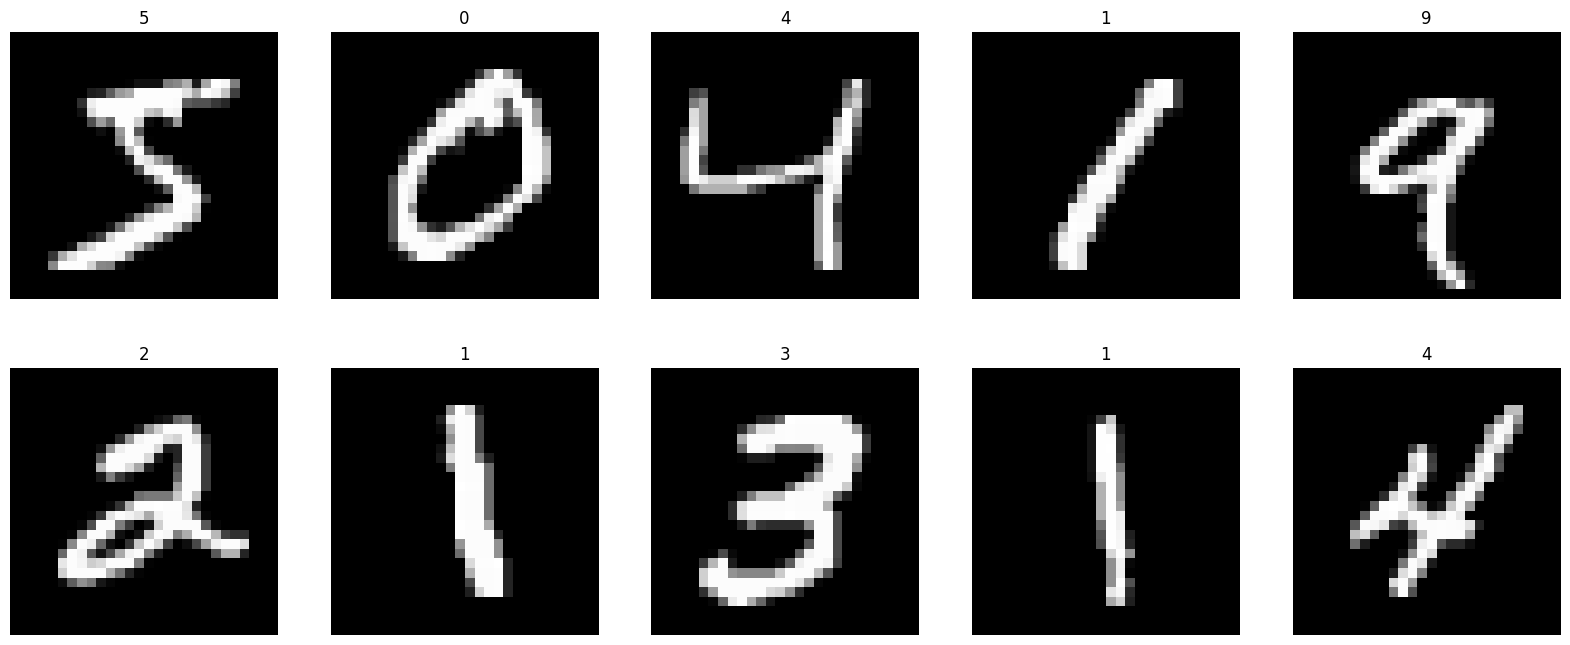

In [36]:
# 2*. SHOW BATCH OF SAMPLES

nrows = 2
ncols = 5
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i in range(nrows * ncols):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')
  plt.gray()
  plt.grid(False)

  # from file
  #plt.title(mnist_from_file_training_labels[i])
  #plt.imshow(mnist_from_file_training_images[i])

  # from TF
  plt.title(mnist_from_tf_training_labels[i])
  plt.imshow(mnist_from_tf_training_images[i])

plt.show()

In [21]:
# 3. NORMALIZE DATA

mnist_from_tf_training_images = mnist_from_tf_training_images / 255.0
mnist_from_tf_test_images = mnist_from_tf_test_images / 255.0

mnist_from_file_training_images = mnist_from_file_training_images / 255.0
mnist_from_file_test_images = mnist_from_file_test_images / 255.0

In [22]:
# PRINT SHAPE
print(mnist_from_tf_training_images.shape)
print(mnist_from_tf_test_images.shape)

print()

print(mnist_from_file_training_images.shape)
print(mnist_from_file_test_images.shape)

(60000, 28, 28)
(10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
# 4. RESCALE DATA: add extra axis to greascale images

def rescale(data):
  return np.reshape(data, data.shape + (1,))

mnist_from_tf_training_images = rescale(mnist_from_tf_training_images)
mnist_from_tf_test_images = rescale(mnist_from_tf_test_images)

mnist_from_file_training_images = rescale(mnist_from_file_training_images)
mnist_from_file_test_images = rescale(mnist_from_file_test_images)

In [24]:
# PRINT SHAPE

print(mnist_from_tf_training_images.shape)
print(mnist_from_tf_test_images.shape)

print()

print(mnist_from_file_training_images.shape)
print(mnist_from_file_test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [25]:
# 5. CALLBACKS
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') >= 0.9:
      print("\nWe've got the desired accuracy")
      self.model.stop_training = True

    #if logs.get('loss') <= 0.1:
    #  print("\nWe've got the desired loss")
    #  self.model.stop_training = True

callbacks = MyCallback()

In [26]:
# 6. MODEL DEFINITION

def dense_classifier(input_shape, nclasses):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(input_shape),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(16, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(32, activation=tf.nn.relu),
      tf.keras.layers.Dense(nclasses, activation=tf.nn.softmax)
  ])

  model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [27]:
# 7. DENSE MODEL EXAMPLE

training_images = mnist_from_file_training_images
training_labels = mnist_from_file_training_labels

test_images = mnist_from_file_test_images
test_labels = mnist_from_file_test_labels

# ... or from TF

# 7.1. Define model
model = dense_classifier(training_images[0].shape, 10)

# 7.2. Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,602 (64.85 KB)

 Trainable params: 16,602 (64.85 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 7.3. Fit model
print('Model fitting:')

history = model.fit(
    training_images,
    training_labels,
    batch_size=256,
    epochs=20,
    #callbacks=[callbacks]
    )

Model fitting:
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4806 - loss: 1.4854
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9057 - loss: 0.3249
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9256 - loss: 0.2524
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9354 - loss: 0.2218
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9408 - loss: 0.1997
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9484 - loss: 0.1757
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9524 - loss: 0.1637
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9573 - loss: 0.1454
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9601 - loss: 0.1370
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9602 - loss: 0.1321
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9630 - loss: 0.1258
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━

In [29]:
# 7.4. Evaluate model
print('Model evaluation:')

model.evaluate(test_images, test_labels)

Model evaluation:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9493 - loss: 0.1655  


[0.14635342359542847, 0.95660001039505]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step
[5.5032883e-06 1.4626829e-10 6.6562031e-08 3.5388677e-08 2.0158312e-07
 9.0421267e-08 9.9999404e-01 8.7204832e-10 4.4456826e-08 8.5129247e-12]
True label: 6
Predicted label: 6
WRONG label: 8


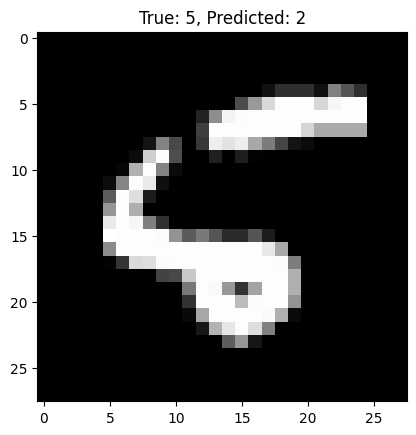

In [30]:
# 7.5 Prediction
classifications = model.predict(test_images)

index = 1921

print(classifications[index])
print(f'True label: {test_labels[index]}')
print(f'Predicted label: {np.argmax(classifications[index])}')

for i in range(test_images.shape[0]):
  if test_labels[i] != np.argmax(classifications[i]):
    print(f'WRONG label: {i}')
    index = i
    break

sp.axis('Off')
plt.grid(False)
plt.gray()
plt.title(f'True: {test_labels[index]}, Predicted: {np.argmax(classifications[index])}')
plt.imshow(test_images[index])

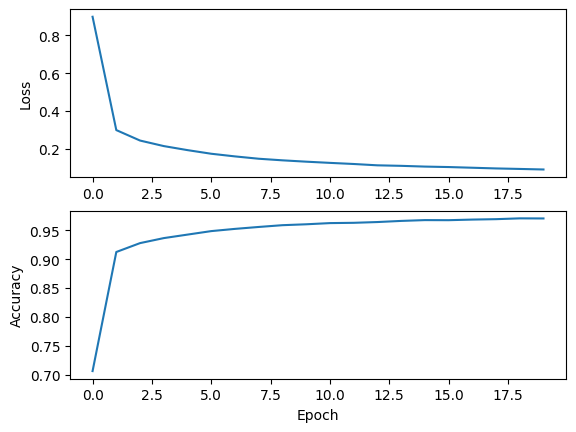

In [31]:
# 7.6. Draw loss & accuracy graphs

loss_values = history.history['loss']
accuracy_values = history.history['accuracy']

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(range(len(loss_values)), loss_values)
ax2.plot(range(len(accuracy_values)), accuracy_values)

ax1.set(ylabel='Loss')
ax2.set(xlabel='Epoch', ylabel='Accuracy')

plt.show()

In [37]:
# 1. ARCHITECTURE MODIFICATION AND COMPARISON
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Helper function: Rescale images
def rescale(data):
    return np.reshape(data, data.shape + (1,))

# Helper function: Plot results
def plot_results(history, title):
    loss_values = history.history['loss']
    accuracy_values = history.history['accuracy']

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
    ax1.plot(range(len(loss_values)), loss_values, label='Loss')
    ax1.set_title(f'{title} - Loss')
    ax2.plot(range(len(accuracy_values)), accuracy_values, label='Accuracy')
    ax2.set_title(f'{title} - Accuracy')

    ax1.legend(), ax2.legend()
    plt.tight_layout()
    plt.show()

In [39]:
# Load MNIST from TensorFlow
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessing: Normalize and reshape images
training_images = rescale(training_images / 255.0)
test_images = rescale(test_images / 255.0)

In [40]:
# Different model architectures to test
architectures = [
    {"name": "Baseline (Dense)", "layers": [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]},
    {"name": "Deep Dense", "layers": [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]},
    {"name": "Dropout Dense", "layers": [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ]}
]


Training model: Baseline (Dense)
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7861 - loss: 0.7921
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9386 - loss: 0.2179
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9561 - loss: 0.1592
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9652 - loss: 0.1274
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9704 - loss: 0.1055
Test Accuracy: 0.9662


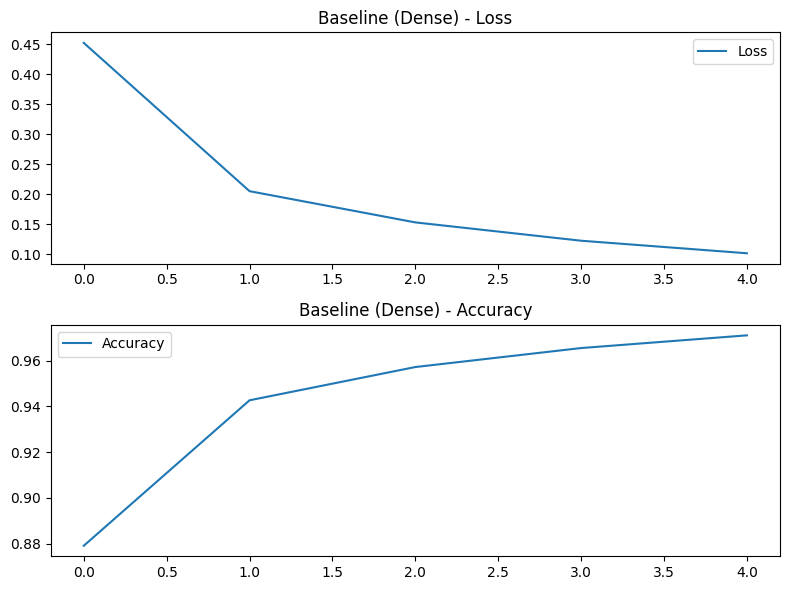


Training model: Deep Dense
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8192 - loss: 0.6314
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.1327
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9762 - loss: 0.0823
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9816 - loss: 0.0634
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0423
Test Accuracy: 0.9779


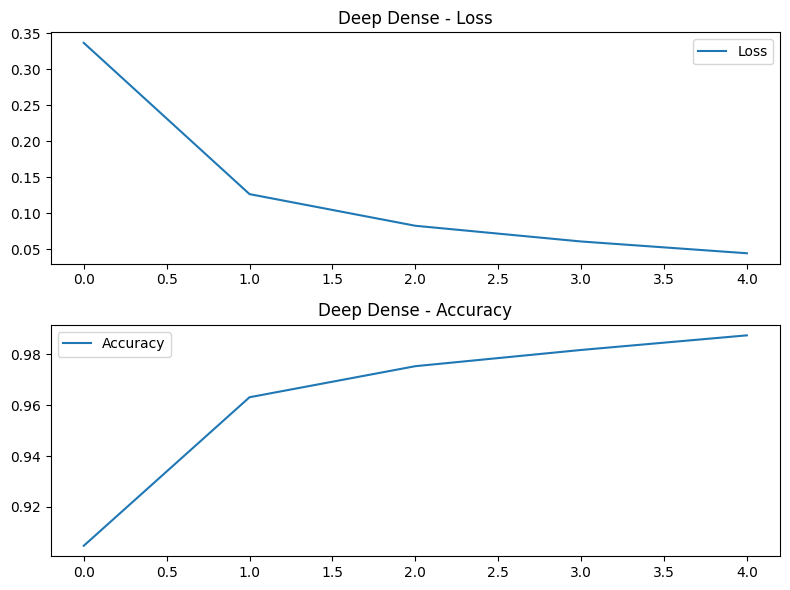


Training model: Dropout Dense
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7050 - loss: 0.9499
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9051 - loss: 0.3269
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9244 - loss: 0.2602
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9347 - loss: 0.2262
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1997
Test Accuracy: 0.9624


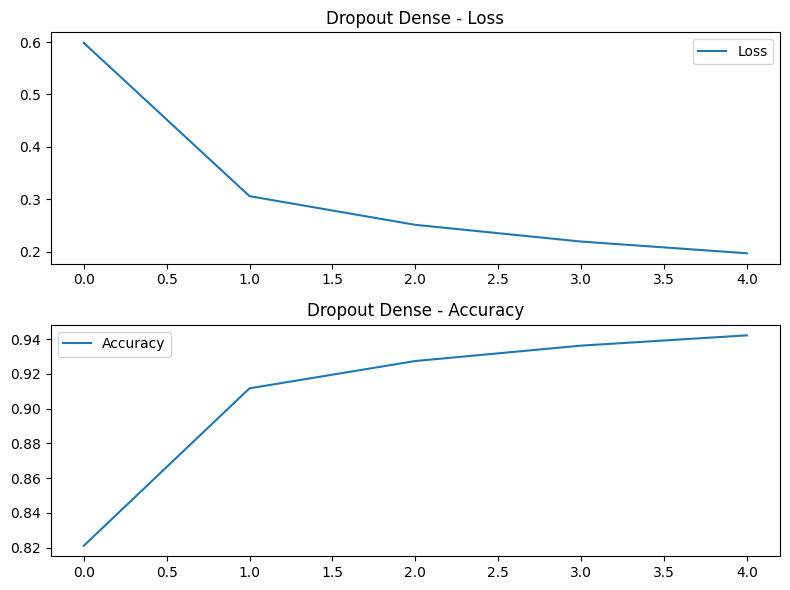

In [41]:
# Loop through architectures and train models
for arch in architectures:
    print(f"\nTraining model: {arch['name']}")

    # Define model
    model = tf.keras.Sequential(arch['layers'])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(training_images, training_labels, epochs=5, batch_size=256, verbose=1)

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Plot results
    plot_results(history, arch['name'])

In [43]:
# 2. MNIST AND NPZ DATASET ANALYSIS
import os
import numpy as np
import matplotlib.pyplot as plt

# Define path to MNIST npz file
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "./mnist.npz")

# Load MNIST npz file
with np.load(data_path) as data:
    npz_training_images = data['x_train']
    npz_training_labels = data['y_train']
    npz_test_images = data['x_test']
    npz_test_labels = data['y_test']



NPZ Dataset Shapes:
Training Images: (60000, 28, 28), Training Labels: (60000,)
Test Images: (10000, 28, 28), Test Labels: (10000,)


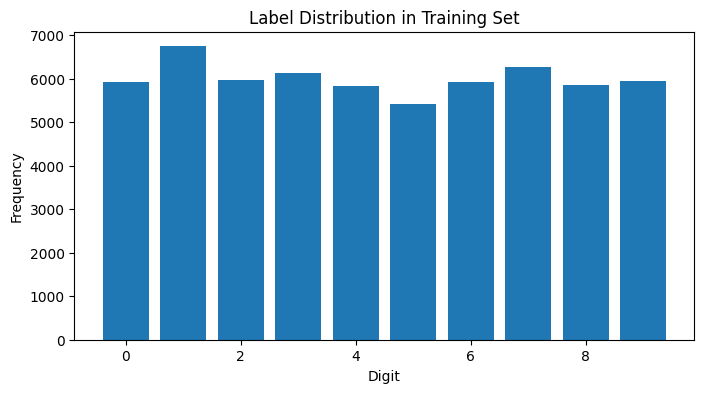

In [44]:
# Analyze dataset: Print shapes
print("\nNPZ Dataset Shapes:")
print(f"Training Images: {npz_training_images.shape}, Training Labels: {npz_training_labels.shape}")
print(f"Test Images: {npz_test_images.shape}, Test Labels: {npz_test_labels.shape}")

# Plot histogram of labels
plt.figure(figsize=(8, 4))
plt.hist(npz_training_labels, bins=range(11), rwidth=0.8, align='left')
plt.title("Label Distribution in Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()

In [45]:
# Save and reload npz file as a test
save_path = os.path.join(current_dir, "mnist_test_save.npz")
np.savez(save_path, x_train=npz_training_images, y_train=npz_training_labels, x_test=npz_test_images, y_test=npz_test_labels)

# Reload and verify
with np.load(save_path) as reloaded_data:
    print("\nReloaded NPZ Data Keys:", reloaded_data.files)
    print(f"Reloaded Training Images Shape: {reloaded_data['x_train'].shape}")


Reloaded NPZ Data Keys: ['x_train', 'y_train', 'x_test', 'y_test']
Reloaded Training Images Shape: (60000, 28, 28)
